## **Challenge One: Data Analysis**  
**Question 1:  How many incidents were opened in each year (beginning with 2010)?**

In [ ]:
# Necessary imports for the operations

# !pip install psycopg2-binary
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import re
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
# Function provided to access the Dataset from Redshift Database

def query_db(query):
 '''
    Runs sql query on 311 database and returns a pandas DataFrame.
    Redshift is a data warehouse based on PostgreSQL, so syntax is mostly the same
    '''
 host = 'interview-ds.ckgnwnm6pw4o.us-east-1.redshift.amazonaws.com'
 port = 5439
 db = 'interview'
 username = 'dsguest'
 password = 'nX9EFYUZ5Yu#0q'
 conn = psycopg2.connect(host=host, port=port, dbname=db, user=username, password=password)
 cur = conn.cursor()
 cur.execute(query)
 rows = cur.fetchall()
 rows = pd.DataFrame(rows)
 return rows

# Querying from Database

In [ ]:
# query to retrieve created_date column from the DB
created_date_column = query_db("SELECT created_date FROM public.three_one_one;")

# Renaming the column of the Pandas Dataframe appropriately
df = created_date_column.rename(columns={0: 'created_date'})

# Data Cleaning

In [ ]:
# Check if column contains any null values
df['created_date'].isnull().values.any()

False

In [ ]:
# Asserting that column contains all values of type: datetime
type_check_result = df['created_date'].apply(lambda value: isinstance(value, datetime))

# The all() function on a pandas dataframe returns True if all the values in the series are True
type_check_result.all()

True

# Data Processing

In [ ]:
# Extracting year as a column from the given timestamps
df['year'] = df['created_date'].apply(lambda x: pd.Timestamp(x).strftime('%Y'))
df.head()

,created_date,year
0,2010-01-01,2010
1,2010-01-01,2010
2,2010-01-01,2010
3,2010-01-01,2010
4,2010-01-01,2010


In [ ]:
# Converting year column to Integer type
df['year'] = df['year'].astype(str).astype(int)

# Data Visualization

In [ ]:
# Retreiving counts of each year and sorting them in order of year value (index)
incident_value_counts = df['year'].value_counts().sort_index()

year_values = incident_value_counts.index
incidents_opened_count = incident_value_counts.values

Incidents opened in the New York City with the 311 Service per year are shown below :-

In [ ]:
print(incident_value_counts)
# YEAR - INCIDENTS OPENED

2010    2031813
2011    1961598
2012    1796207
2013    1839974
2014    2114000
2015    2300760
2016    2391426
2017    2491969
2018    2747985
2019    1675384
Name: year, dtype: int64


# Plotting a Bar Chart to Visualize the reported incidents each year, from 2010 to 2019

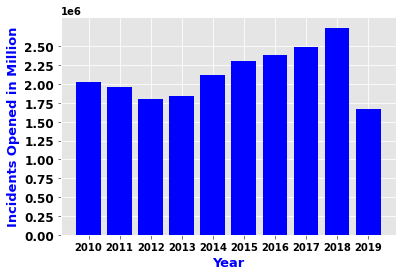

In [ ]:
# Plotting properties
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots()

# Formatting the x-axis
plt.xticks(np.arange(min(year_values), max(year_values)+1, 1.0))
plt.xlabel('Year', fontsize=13, fontweight='bold')
ax.xaxis.label.set_color('blue')
ax.xaxis.set_tick_params(labelsize = 10, labelcolor = 'black')

# Formatting the y-axis
plt.yticks(np.arange(0, max(incidents_opened_count)+1, 250000))
plt.ylabel('Incidents Opened in Million', fontsize=13, fontweight='bold')
ax.yaxis.label.set_color('blue')
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = 'black')

# Plotting the Line Chart
ax.bar(year_values, incidents_opened_count, color = 'blue')
plt.show()

# Plotting a Line Chart to Visualize the Trend of reported incidents from 2010 to 2019

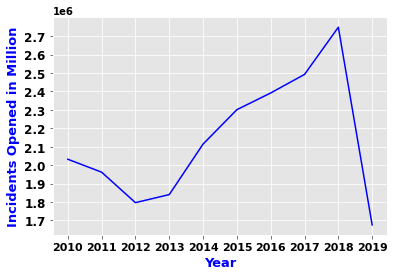

In [ ]:
# Plotting properties
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig, ax = plt.subplots()

# Formatting the x-axis
plt.xticks(np.arange(min(year_values), max(year_values)+1, 1.0))
plt.xlabel('Year', fontsize=13, fontweight='bold')
ax.xaxis.label.set_color('blue')
ax.xaxis.set_tick_params(labelsize = 11, labelcolor = 'black')

# Formatting the y-axis
plt.yticks(np.arange(0, max(incidents_opened_count)+1, 100000))
plt.ylabel('Incidents Opened in Million', fontsize=13, fontweight='bold')
ax.yaxis.label.set_color('blue')
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = 'black')

# Plotting the Line Chart
ax.plot(year_values, incidents_opened_count, color = 'blue')
plt.show()

It is evident from the chart above that the incidents opened **dropped from 2010 to 2012**.  
A **steady increase** in reported incidents was observed from **2012 to 2018**.   
**Most** number of incidents were opened in **2018**.  
A **sudden downfall** of reported incidents was seen from 2018 to 2019.